For this project, I first tried using AI, and then switched to modifying the code of another person. The original code can be found at the following URL: https://www.kaggle.com/code/vijayaadithyanvg/car-price-prediction-used-cars

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import numpy as np


In [ ]:
car_df = pd.read_csv('cars.csv')
# Extract brand from name column
car_df.insert(0, "make", car_df['name'].apply(lambda x: x.split()[0]))
car_df.insert(1, "model", car_df['name'].apply(lambda x: " ".join(x.split()[1:])))
car_df = car_df.drop(columns='name', axis=1)
car_df['selling_price'] = car_df['selling_price'].multiply(0.012)
make = car_df['make'].unique()
make_dict = {}
for i in range(len(make)):
    make_dict[make[i]] = i
print(make_dict)
car_df['make'] = car_df['make'].map(make_dict)
car_df.sort_values(by='selling_price', ascending=False)

{'Maruti': 0, 'Skoda': 1, 'Honda': 2, 'Hyundai': 3, 'Toyota': 4, 'Ford': 5, 'Renault': 6, 'Mahindra': 7, 'Tata': 8, 'Chevrolet': 9, 'Fiat': 10, 'Datsun': 11, 'Jeep': 12, 'Mercedes-Benz': 13, 'Mitsubishi': 14, 'Audi': 15, 'Volkswagen': 16, 'BMW': 17, 'Nissan': 18, 'Lexus': 19, 'Jaguar': 20, 'Land': 21, 'MG': 22, 'Volvo': 23, 'Daewoo': 24, 'Kia': 25, 'Force': 26, 'Ambassador': 27, 'Ashok': 28, 'Isuzu': 29, 'Opel': 30, 'Peugeot': 31}


,make,model,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
170,23,XC90 T8 Excellence BSIV,2017,120000.000,30000,Petrol,Individual,Automatic,First Owner,42.0 kmpl,1969 CC,400 bhp,640Nm@ 1740rpm,4.0
2938,17,X7 xDrive 30d DPE,2020,86400.000,5000,Diesel,Individual,Automatic,First Owner,13.38 kmpl,2993 CC,265 bhp,620Nm@ 1500-2500rpm,7.0
4952,15,A6 35 TFSI Matrix,2019,78276.000,23600,Petrol,Dealer,Automatic,Test Drive Car,15.26 kmpl,1798 CC,187.74 bhp,320Nm@ 1400-4100rpm,5.0
4950,15,A6 35 TFSI Matrix,2019,74676.000,7800,Petrol,Dealer,Automatic,Test Drive Car,15.26 kmpl,1798 CC,187.74 bhp,320Nm@ 1400-4100rpm,5.0
7713,13,S-Class S 350 CDI,2017,72000.000,37000,Diesel,Dealer,Automatic,First Owner,13.5 kmpl,2987 CC,254.79 bhp,620Nm@ 1600-2400rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926,0,800 Std,2004,378.048,110000,Petrol,Individual,Manual,Third Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
5965,0,800 Std,2000,372.000,56194,Petrol,Individual,Manual,Fourth & Above Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
6776,3,Santro GLS I - Euro I,2000,360.000,90000,Petrol,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,NaN
2145,0,Zen LXI,2001,360.000,10000,Petrol,Individual,Manual,First Owner,17.3 kmpl,993 CC,60 bhp,78Nm@ 4500rpm,5.0


In [15]:
car_df.shape
#rows, then columns

(8128, 14)

In [16]:
car_df.isnull().sum()

make               0
model              0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

For this analysis, I don't really care about the columns with missing data, so I don't need to drop those records.

In [17]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   make           8128 non-null   object 
 1   model          8128 non-null   object 
 2   year           8128 non-null   int64  
 3   selling_price  8128 non-null   float64
 4   km_driven      8128 non-null   int64  
 5   fuel           8128 non-null   object 
 6   seller_type    8128 non-null   object 
 7   transmission   8128 non-null   object 
 8   owner          8128 non-null   object 
 9   mileage        7907 non-null   object 
 10  engine         7907 non-null   object 
 11  max_power      7913 non-null   object 
 12  torque         7906 non-null   object 
 13  seats          7907 non-null   float64
dtypes: float64(2), int64(2), object(10)
memory usage: 889.1+ KB


In [18]:
print(car_df.selling_price.value_counts())

selling_price
3600.000    227
7200.000    213
4200.000    209
6600.000    204
5400.000    195
           ... 
2435.988      1
6492.000      1
3048.000      1
6336.000      1
1224.000      1
Name: count, Length: 677, dtype: int64


In [63]:
categories = ['make', 'fuel', 'transmission', 'owner']
for category in categories:
    category_dict = {}
    c = car_df[category].unique()
    print(f"Number of unique values in {category}: {len(c)}")
    for i in range(len(c)):
        category_dict[c[i]] = i
    car_df[category] = car_df[category].map(category_dict)
car_df.sort_values(by='selling_price', ascending=False)

Number of unique values in make: 32
Number of unique values in fuel: 4
Number of unique values in transmission: 2
Number of unique values in owner: 5


,make,model,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
170,23,XC90 T8 Excellence BSIV,2017,120000.000,30000,1,Individual,1,0,42.0 kmpl,1969 CC,400 bhp,640Nm@ 1740rpm,4.0
2938,17,X7 xDrive 30d DPE,2020,86400.000,5000,0,Individual,1,0,13.38 kmpl,2993 CC,265 bhp,620Nm@ 1500-2500rpm,7.0
4952,15,A6 35 TFSI Matrix,2019,78276.000,23600,1,Dealer,1,4,15.26 kmpl,1798 CC,187.74 bhp,320Nm@ 1400-4100rpm,5.0
4950,15,A6 35 TFSI Matrix,2019,74676.000,7800,1,Dealer,1,4,15.26 kmpl,1798 CC,187.74 bhp,320Nm@ 1400-4100rpm,5.0
7713,13,S-Class S 350 CDI,2017,72000.000,37000,0,Dealer,1,0,13.5 kmpl,2987 CC,254.79 bhp,620Nm@ 1600-2400rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926,0,800 Std,2004,378.048,110000,1,Individual,0,2,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
5965,0,800 Std,2000,372.000,56194,1,Individual,0,3,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
6776,3,Santro GLS I - Euro I,2000,360.000,90000,1,Individual,0,2,NaN,NaN,NaN,NaN,NaN
2145,0,Zen LXI,2001,360.000,10000,1,Individual,0,0,17.3 kmpl,993 CC,60 bhp,78Nm@ 4500rpm,5.0


In [20]:
z_scores = np.abs(stats.zscore(car_df['selling_price']))
car_df = car_df[(z_scores < 3)]
car_df = car_df.dropna()
car_df = car_df.reset_index(drop=True)
z_scores = np.abs(stats.zscore(car_df['selling_price']))
car_df = car_df[(z_scores < 3)]
car_df = car_df.dropna()
car_df = car_df.reset_index(drop=True)

In [ ]:
y = car_df['selling_price']
features = ['year', 'km_driven', 'make'] #originally fuel had an R^2 of ~0.5,
#changing to make improved R^2 to 0.68
X = car_df[features]

print(features)

['year', 'km_driven', 'make']


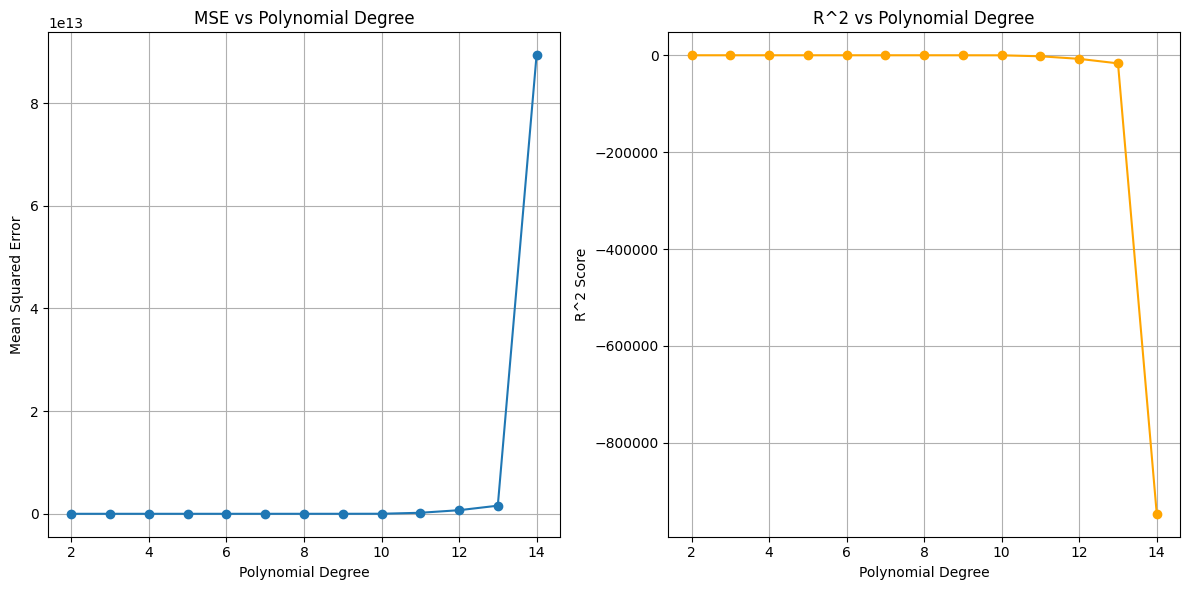

Best degree based on MSE: 4
Best degree based on R^2: 4


In [65]:
# Evaluate polynomial regression for degrees 2 through 10
degrees = range(2, 15)
mse_list = []
r2_list = []

for degree in degrees:
    # Transform features with PolynomialFeatures
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_transform = poly.fit_transform(X)
    
    # Apply StandardScaler for feature scaling
    scaler = StandardScaler()
    X_transform = scaler.fit_transform(X_transform)
    
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=42)
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    y_test_actual = y_test
    y_pred_actual = y_pred
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred_actual)
    r2 = r2_score(y_test, y_pred_actual)
    mse_list.append(mse)
    r2_list.append(r2)

# Plot MSE and R^2 for each degree
plt.figure(figsize=(12, 6))

# Plot MSE
plt.subplot(1, 2, 1)
plt.plot(degrees, mse_list, marker='o', label='MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Polynomial Degree')
plt.grid(True)

# Plot R^2
plt.subplot(1, 2, 2)
plt.plot(degrees, r2_list, marker='o', label='R^2', color='orange')
plt.xlabel('Polynomial Degree')
plt.ylabel('R^2 Score')
plt.title('R^2 vs Polynomial Degree')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print the best degree based on MSE and R^2
best_degree_mse = degrees[np.argmin(mse_list)]
best_degree_r2 = degrees[np.argmax(r2_list)]
print(f"Best degree based on MSE: {best_degree_mse}")
print(f"Best degree based on R^2: {best_degree_r2}")

# Train the final model with the best degree
best_degree = best_degree_r2  # or best_degree_mse based on your preference


Final Model MSE: 29730409.476709645
Final Model R^2: 0.685025052930114


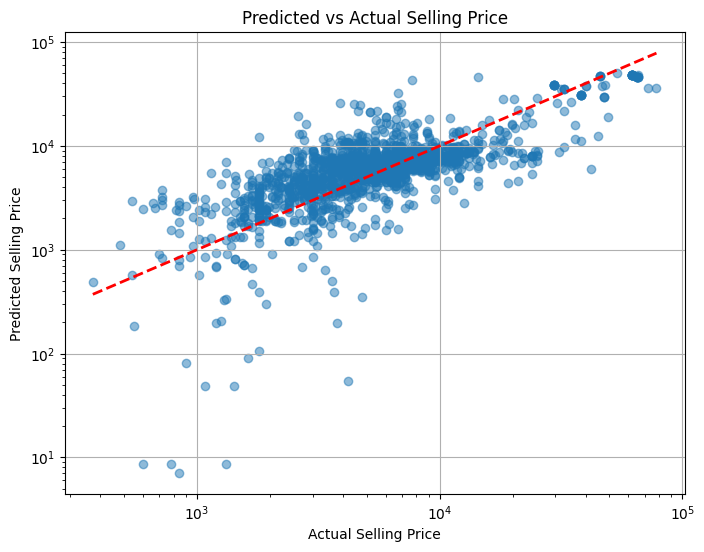

In [66]:
poly = PolynomialFeatures(degree=best_degree, include_bias=False) # REPLACE WITH 2
X_transform = poly.fit_transform(X)
X_transform = scaler.fit_transform(X_transform)
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=42)
#Apparently 42 is convention literally just because of Hitchhiker's Guide to the Galaxy, and I find that hilarious
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Final Model MSE: {mse}")
print(f"Final Model R^2: {r2}")

# Plot the predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Predicted vs Actual Selling Price')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()